In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')

In [10]:
btc = requests.get('https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=100&interval=daily')

In [33]:
bjson = btc.json()
prices = bjson["prices"]
df_price = pd.DataFrame(prices)  
df_price

,0,1
0,1645833600000,39316.162076
1,1645920000000,39090.202154
2,1646006400000,37803.590160
3,1646092800000,43225.404677
4,1646179200000,44459.591628
...,...,...
96,1654128000000,29833.450330
97,1654214400000,30481.013996
98,1654300800000,29714.143487
99,1654387200000,29872.360309


In [36]:
df_price = df_price.rename({0: 'date', 1: 'price'}, axis=1)  # new method
df_price.head()

,date,price
0,1645833600000,39316.162076
1,1645920000000,39090.202154
2,1646006400000,37803.590160
3,1646092800000,43225.404677
4,1646179200000,44459.591628


In [37]:
df_price.set_index('date')

,price
date,
1645833600000,39316.162076
1645920000000,39090.202154
1646006400000,37803.590160
1646092800000,43225.404677
1646179200000,44459.591628
...,...
1654128000000,29833.450330
1654214400000,30481.013996
1654300800000,29714.143487


In [31]:
coins = ['ethereum','litecoin','ripple','bitcoin']
s =",".join(coins)
s

'ethereum,litecoin,ripple,bitcoin'

In [37]:
api_url = 'https://api.coingecko.com/api/v3/coins/{}/market_chart?vs_currency=usd&days={}&interval=daily'

def get_crypto_data(coin, days):
    '''Retrieve cryptocurrency data from poloniex'''
    json_url = api_url.format(coin, days)
    resp = requests.get(json_url)
    bjson = resp.json()
    prices = bjson["prices"]
    df_price = pd.DataFrame(prices)  
    df_price = df_price.rename({0: 'date', 1: 'price'}, axis=1)  # new method
    df_price = df_price.set_index('date')
    return df_price

In [38]:
crypto = ['ethereum','litecoin','ripple','bitcoin']

crypto_data = {}
for coin in crypto:
    crypto_price_df = get_crypto_data(coin, 200)
    crypto_data[coin] = crypto_price_df

In [34]:
crypto_data['bitcoin'].head()

,price
date,
1637193600000,60603.655867
1637280000000,56987.322339
1637366400000,58459.255517
1637452800000,60082.911668
1637539200000,59139.779280


In [35]:
dfp = pd.concat(crypto_data, axis=1)

In [39]:
dfp.columns = crypto
dfp.head()

,ethereum,litecoin,ripple,bitcoin
date,,,,
1637193600000,4302.804959,229.583115,1.100460,60603.655867
1637280000000,3993.846595,203.447018,1.037537,56987.322339
1637366400000,4317.603196,219.278253,1.091305,58459.255517
1637452800000,4436.192767,226.343632,1.100303,60082.911668
1637539200000,4319.361567,224.272386,1.069316,59139.779280


In [13]:
mean_daily_ret = dfp.pct_change(1).mean()
mean_daily_ret

bitcoin    -0.002864
ethereum   -0.003373
litecoin   -0.005224
ripple     -0.003950
dtype: float64

In [14]:
dfp.pct_change(1).corr()  # Correlation matrix

,bitcoin,ethereum,litecoin,ripple
bitcoin,1.000000,0.891143,0.871613,0.758536
ethereum,0.891143,1.000000,0.871918,0.776939
litecoin,0.871613,0.871918,1.000000,0.828829
ripple,0.758536,0.776939,0.828829,1.000000


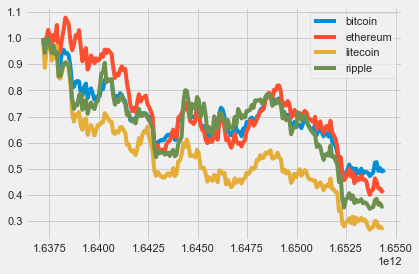

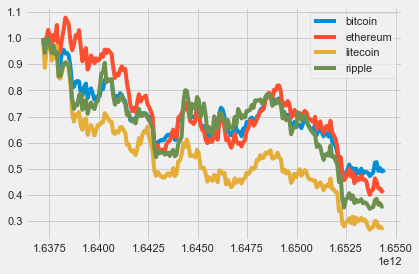

In [20]:
crypto_normed = dfp/dfp.iloc[0]
crypto_normed.head()
fig, ax = plt.subplots()
plt.plot(crypto_normed)
plt.legend(crypto_normed.columns)
fig

In [11]:
crypto_normed.head()

,price,price,price,price
date,,,,
1637193600000,1.000000,1.000000,1.000000,1.000000
1637280000000,0.940328,0.928196,0.886158,0.942821
1637366400000,0.964616,1.003439,0.955115,0.991682
1637452800000,0.991407,1.031000,0.985890,0.999858
1637539200000,0.975845,1.003848,0.976868,0.971700


In [40]:
crypto_daily_ret = dfp.pct_change(1)  # Daily return
crypto_daily_ret.head()

,ethereum,litecoin,ripple,bitcoin
date,,,,
1637193600000,NaN,NaN,NaN,NaN
1637280000000,-0.071804,-0.113842,-0.057179,-0.059672
1637366400000,0.081064,0.077815,0.051823,0.025829
1637452800000,0.027467,0.032221,0.008245,0.027774
1637539200000,-0.026336,-0.009151,-0.028162,-0.015697


In [41]:
log_ret = np.log(dfp/dfp.shift(1))  #Log return
log_ret.head()

,ethereum,litecoin,ripple,bitcoin
date,,,,
1637193600000,NaN,NaN,NaN,NaN
1637280000000,-0.074512,-0.120859,-0.058879,-0.061526
1637366400000,0.077946,0.074936,0.050525,0.025501
1637452800000,0.027096,0.031713,0.008211,0.027395
1637539200000,-0.026689,-0.009193,-0.028566,-0.015822


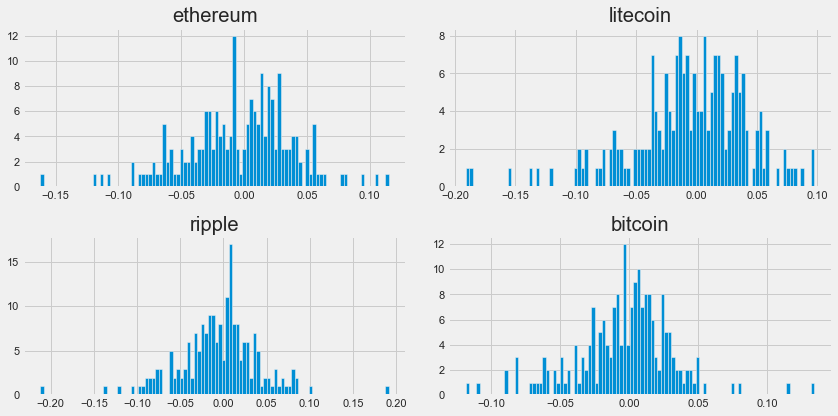

In [42]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [43]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ethereum,200.0,-0.004287,0.041798,-0.162093,-0.029869,0.000163,0.023004,0.115259
litecoin,199.0,-0.006441,0.047902,-0.191063,-0.030915,-0.002409,0.024473,0.097451
ripple,199.0,-0.005171,0.046207,-0.212000,-0.029542,-0.002111,0.019227,0.191714
bitcoin,199.0,-0.003555,0.034800,-0.118283,-0.021304,0.000179,0.015450,0.134024


In [44]:
log_ret.mean() * 252

ethereum   -1.080371
litecoin   -1.623147
ripple     -1.303178
bitcoin    -0.895830
dtype: float64

In [45]:
log_ret.cov()

,ethereum,litecoin,ripple,bitcoin
ethereum,0.001747,0.001749,0.001526,0.001301
litecoin,0.001749,0.002295,0.001855,0.001458
ripple,0.001526,0.001855,0.002135,0.001236
bitcoin,0.001301,0.001458,0.001236,0.001211


In [46]:
num_ports = 10000

all_weights = np.zeros((num_ports,len(dfp.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [47]:
sharpe_arr.max()

-1.6582037408598937

In [48]:
sharpe_arr.argmax()

9565

In [53]:
all_weights[sharpe_arr.argmax(),:]

array([8.59250284e-01, 1.73399449e-02, 2.14086254e-04, 1.23195684e-01])

In [61]:
optimal_ratio = list(all_weights[sharpe_arr.argmax(),:])
optimal_portfolio = {}
crypto = ['bitcoin', 'litecoin', 'ripple', 'ethereum']
print("optimal ratio: ", optimal_ratio)
i = 0
for coin in crypto:
    print(coin)
    optimal_portfolio[coin] = round(optimal_ratio[i] * 100)
    i += 1
print("optimal: ", optimal_portfolio)

optimal ratio:  [0.8592502843746258, 0.01733994493857983, 0.0002140862536025863, 0.12319568443319168]
bitcoin
litecoin
ripple
ethereum
optimal:  {'bitcoin': 86, 'litecoin': 2, 'ripple': 0, 'ethereum': 12}


In [49]:
dfp.columns

Index(['ethereum', 'litecoin', 'ripple', 'bitcoin'], dtype='object')

In [50]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
print('Return with Maximum SR')
print(max_sr_ret)
print('Volality with Maximum SR')
print(max_sr_vol)

Return with Maximum SR
-1.0670956732364871
Volality with Maximum SR
0.6435250668793715


C:\Users\danie\AppData\Local\Temp\ipykernel_4180\2751900792.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe Ratio')


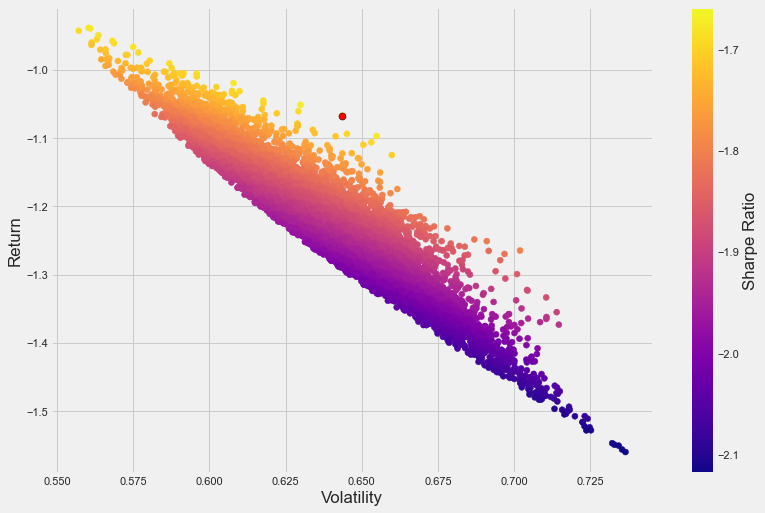

In [51]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [96]:

## Efficient Frontier
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(.9,1.8,50) # Change 100 to a lower number for slower computers!

In [97]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [98]:

def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [99]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [100]:

# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [102]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

In [103]:
from scipy.optimize import minimize

In [104]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

C:\Users\danie\AppData\Local\Temp\ipykernel_18924\3066378363.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe Ratio')


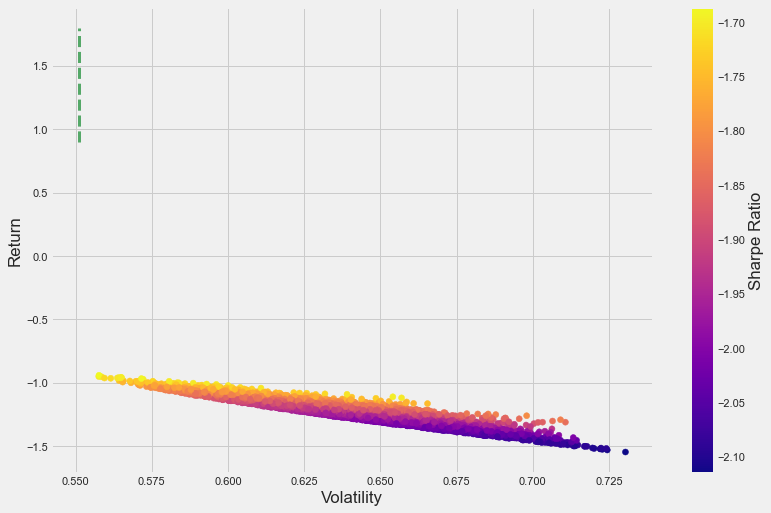

In [105]:

plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)